In [1]:
import cv2
import numpy as np
import pytesseract  
import matplotlib.pyplot as plt
import pandas as pd


In [8]:
# def detect_number(circle, image):
#     (x, y, r) = circle
#     roi = image[y-r:y+r, x-r:x+r]
#     # 半径rの円でimgをマスク
#     mask = np.zeros_like(roi)
#     cv2.circle(mask, (r, r), int(30/1.2), 255, -1)  # 引数：画像、中心座標、半径、色、塗りつぶし
#     masked_roi = cv2.bitwise_and(roi, roi, mask=mask)
#     # マスクした外側を中央値の色で塗りつぶす
#     masked_roi[mask == 0] = np.median(masked_roi[mask != 0])
    
#     # 数字認識のための前処理
#     blurred = cv2.GaussianBlur(masked_roi, (5, 5), 0)   # ガウシアンフィルタ
#     _, roi_thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU) # 2値化
#     # ROIの表示
#     plt.imshow(roi_thresh, cmap='gray')
#     plt.show()
#     # 数字認識 (ここでは例としてpytesseractを使用)
#     text = pytesseract.image_to_string(roi_thresh, config='--psm 7 --oem 3 -c tessedit_char_whitelist=0123456789') # 引数：画像、認識モード、OCRエンジン、認識対象文字
#     try:
#         detected_number = int(text.strip())
#     except ValueError:
#         print("認識されたテキストが数字ではありません。")
#         detected_number = -1  # 数字が認識されなかった場合のデフォルト値
#     return detected_number


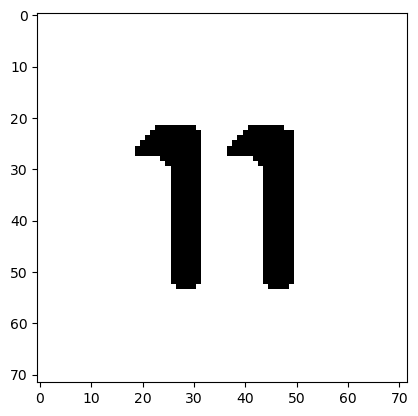

認識されたテキストが数字ではありません。
Center coordinates (x, y): 1832 1548


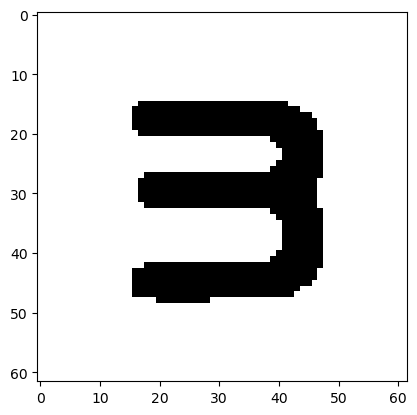

Center coordinates (x, y): 2206 1652


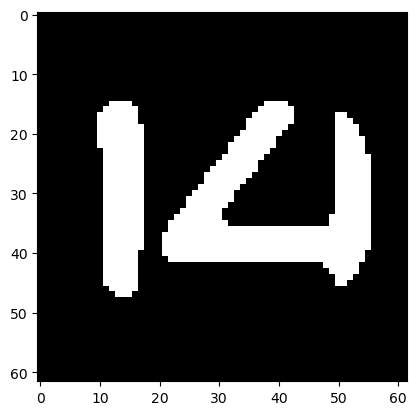

Center coordinates (x, y): 1462 1554


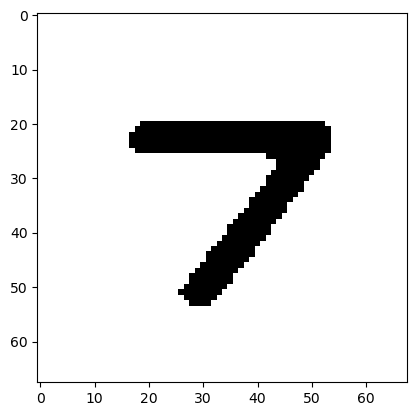

Center coordinates (x, y): 1684 1622


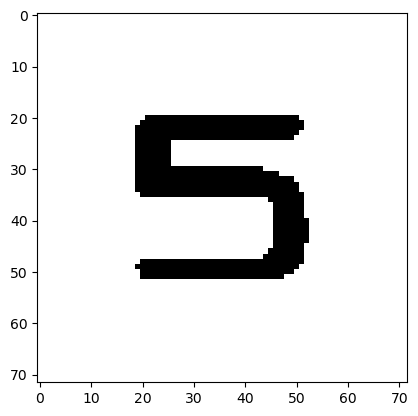

Center coordinates (x, y): 1978 1608


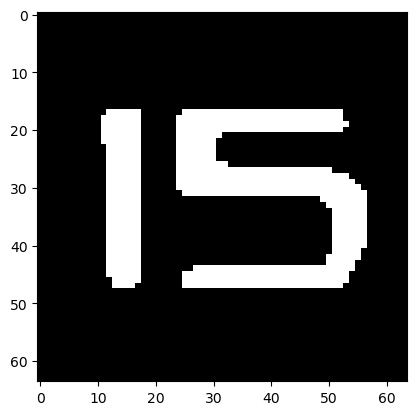

Center coordinates (x, y): 1690 1476


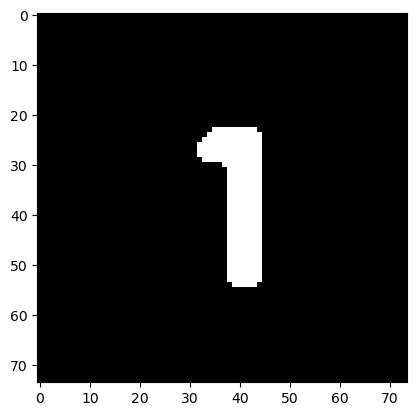

Center coordinates (x, y): 2096 1698


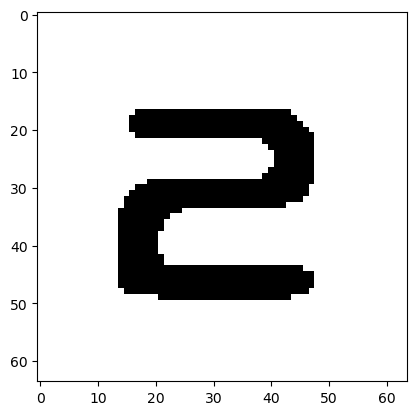

Center coordinates (x, y): 2000 1696


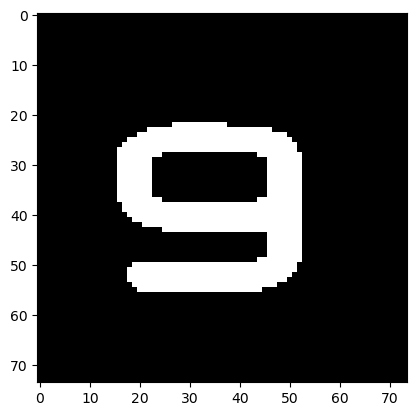

認識されたテキストが数字ではありません。
Center coordinates (x, y): 1916 1580


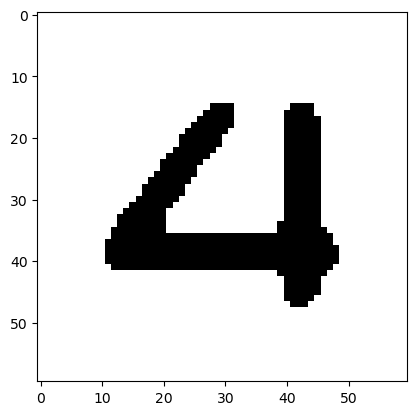

Center coordinates (x, y): 2124 1636


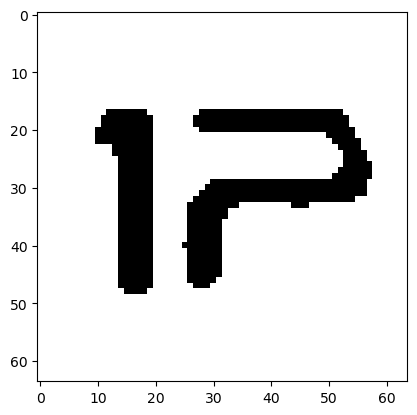

認識されたテキストが数字ではありません。
Center coordinates (x, y): 2102 1534


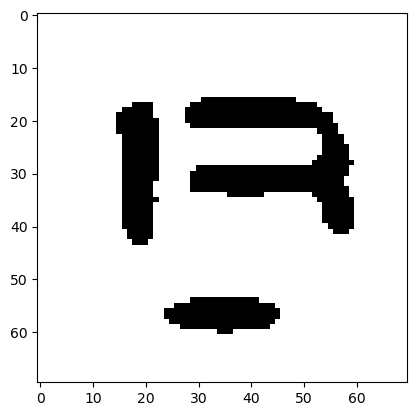

認識されたテキストが数字ではありません。
Center coordinates (x, y): 1914 1532


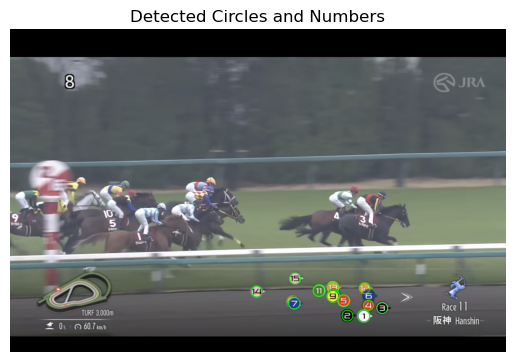

In [9]:

# DataFrameを作成
df = pd.DataFrame(columns=['x', 'y', 'horse_num'])
# 画像を読み込む
image = cv2.imread('keiba_test_img.png')

# 画像をグレースケールに変換

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# ノイズを除去するために画像をぼかす
# blurred = cv2.GaussianBlur(gray, (3, 3), 0) # 引数：画像、カーネルサイズ、標準偏差
blurred = gray

# ハフ変換を使って円を検出
# 対象を画面の中央から幅80%，下20%の範囲に限定
height, width = blurred.shape
# heiht, width でマスク
mask = np.zeros_like(blurred)
mask[int(height*0.7):height, int(width*0.3):int(width*0.8)] = 255
masked_blurred = cv2.bitwise_and(blurred, blurred, mask=mask)
circles = cv2.HoughCircles(masked_blurred, cv2.HOUGH_GRADIENT,
                           dp=1, minDist=20, param1=20, param2=50, minRadius=20, maxRadius=50)

# circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1, minDist=50, param1=50, param2=30, minRadius=30, maxRadius=50)

if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        # x: 円の中心のx座標, y: 円の中心のy座標, r: 円の半径
        horse_num = detect_number((x, y, r), gray)
        # 検出された円を描画
        cv2.circle(image, (x, y), r, (0, 255, 0), 4)
        # 中心座標を描画
        # cv2.circle(image, (x, y), 5, (0, 0, 255), -1)
        # 中心座標を表示
        print("Center coordinates (x, y):", x, y)
        # horse_numを列目として持つDataFrameに追加
        df.loc[len(df)] = [x, y, horse_num]


# 結果を表示
# cv2.imshow("Detected Circles", image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# matplotlibを使って結果を表示
# BGRからRGBに変換
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title('Detected Circles and Numbers')
plt.axis('off')  # 軸を非表示にする
plt.show()

In [6]:
from pytube import YouTube

url = 'https://youtu.be/IriTU35-fUc?si=vB-BhkB_Bs8PWlA4'
url = 'https://www.youtube.com/watch?v=AT1uB6zCptU&t=37s'

yt = YouTube(url)

# 音声を含むストリームを取得
# 解像度は1080p、拡張子はmp4のストリームを取得
stream = yt.streams.get_highest_resolution()
# stream = yt.streams.filter(progressive=True, file_extension='mp4').order_by('resolution').desc().first()

# 動画のダウンロード（現在のディレクトリに保存）
# stream.download()

'/Users/murakamishoya/git/personal/p_github/keiba-visualizer/2024年 桜花賞（GⅠ）  ステレンボッシュ  JRA公式.mp4'

In [2]:
# OpenCVを使用して動画を読み込む
cap = cv2.VideoCapture("2024年 京王杯スプリングカップ（GⅡ）  ウインマーベル  JRA公式.mp4")

# すべてのフレーム数を取得
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(frame_count)

# 最初のフレームを読み込む
ret, frame = cap.read()

# 100フレーム目までスキップ
for i in range(500):
    ret, frame = cap.read()


# フレームが正しく読み込まれたか確認
if ret:
    # フレームを読み込む
    image = frame
    
    print("フレームが画像として保存されました。")
else:
    print("フレームを読み込めませんでした。")

# リソースを解放
cap.release()

2853
フレームが画像として保存されました。


True

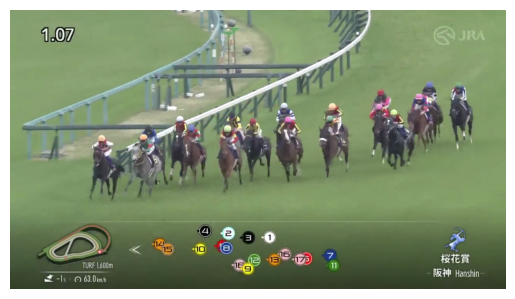

In [18]:
# 動画を読み込む
# cap = cv2.VideoCapture("2024年 京王杯スプリングカップ（GⅡ）  ウインマーベル  JRA公式.mp4")
cap = cv2.VideoCapture("2024年 桜花賞（GⅠ）  ステレンボッシュ  JRA公式.mp4")

# 動画の500フレーム目をキャプチャ
cap.set(cv2.CAP_PROP_POS_FRAMES, 2300)
ret, frame = cap.read()
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis('off')

# 画像を保存
cv2.imwrite('frame_800.jpg', frame)



(18, 3)


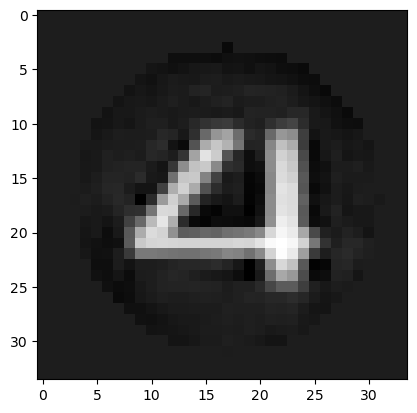

Center coordinates (x, y): 480 628


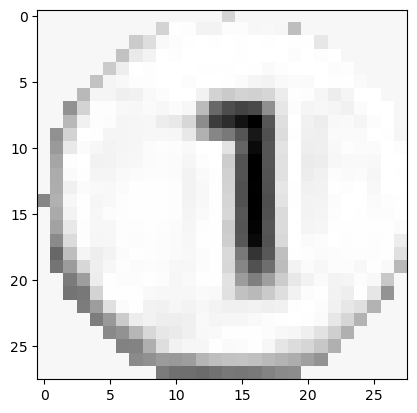

認識されたテキストが数字ではありません。
Center coordinates (x, y): 344 668


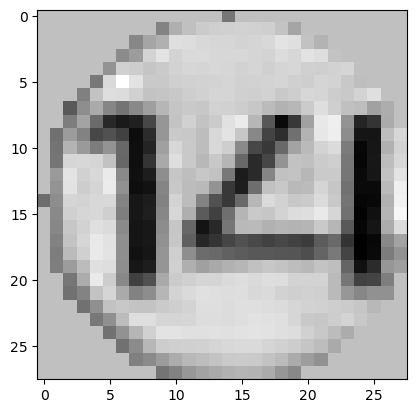

Center coordinates (x, y): 436 570


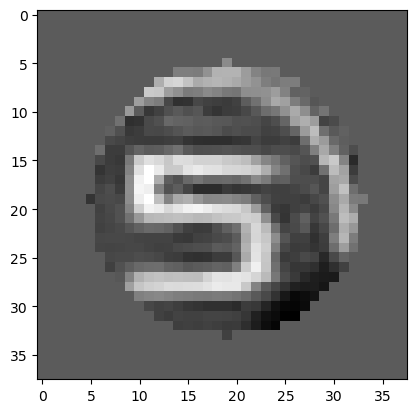

Center coordinates (x, y): 342 632


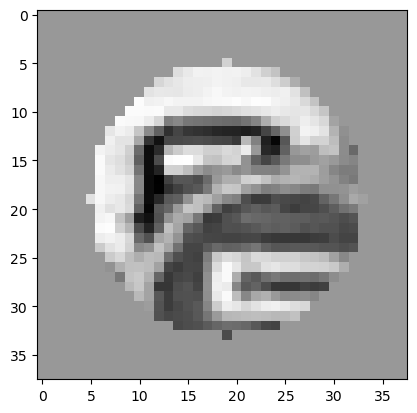

認識されたテキストが数字ではありません。
Center coordinates (x, y): 334 622


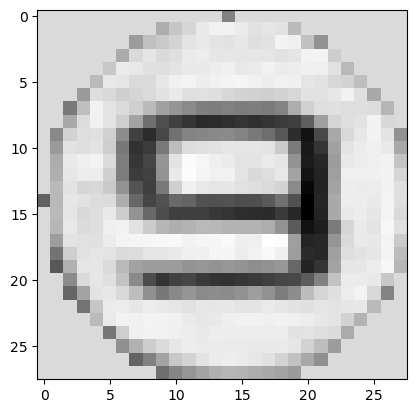

認識されたテキストが数字ではありません。
Center coordinates (x, y): 426 606


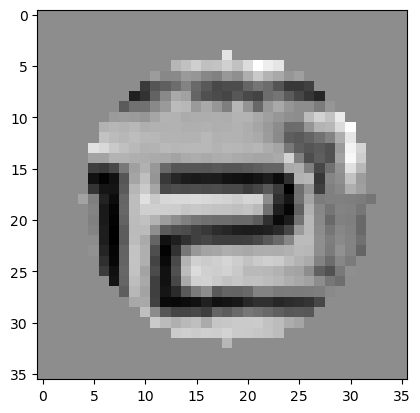

認識されたテキストが数字ではありません。
Center coordinates (x, y): 322 584


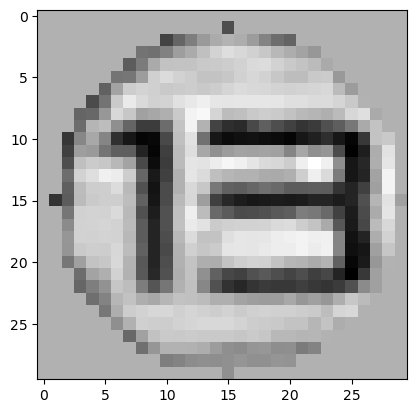

Center coordinates (x, y): 378 590


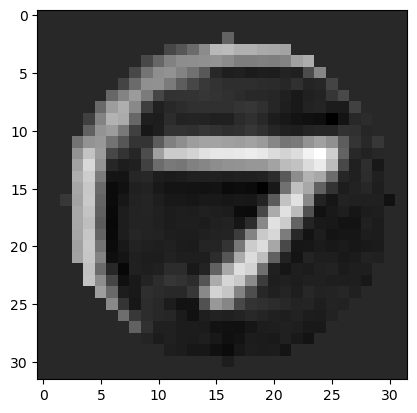

Center coordinates (x, y): 378 618


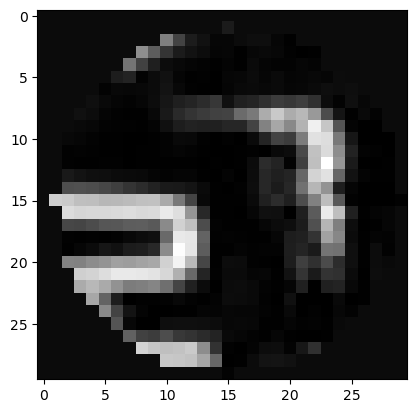

Center coordinates (x, y): 368 648


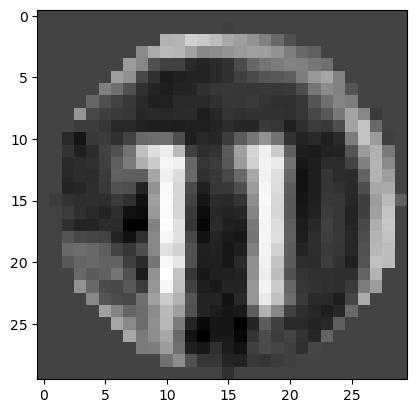

認識されたテキストが数字ではありません。
Center coordinates (x, y): 352 602


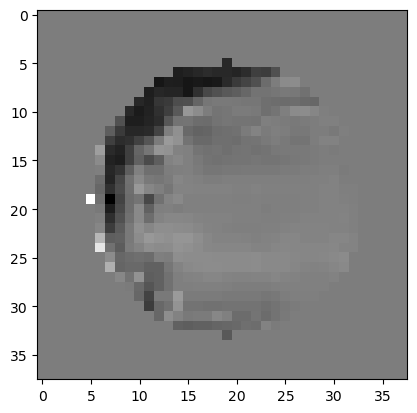

認識されたテキストが数字ではありません。
Center coordinates (x, y): 1044 620


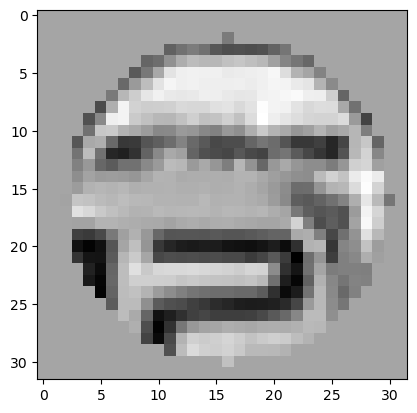

認識されたテキストが数字ではありません。
Center coordinates (x, y): 322 578


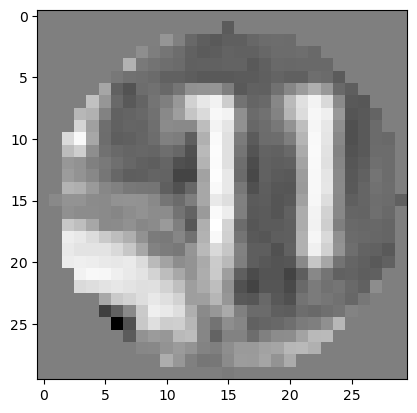

認識されたテキストが数字ではありません。
Center coordinates (x, y): 348 606


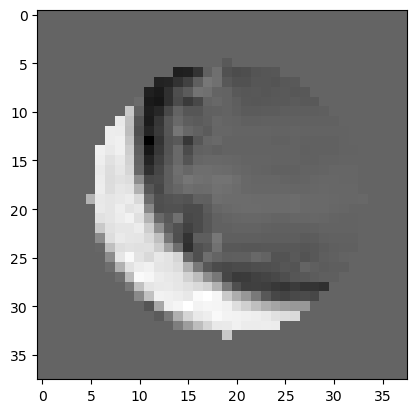

認識されたテキストが数字ではありません。
Center coordinates (x, y): 1040 626


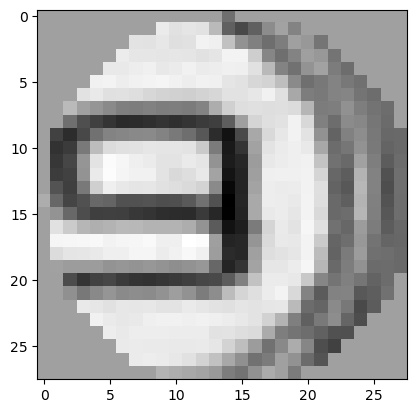

認識されたテキストが数字ではありません。
Center coordinates (x, y): 432 606


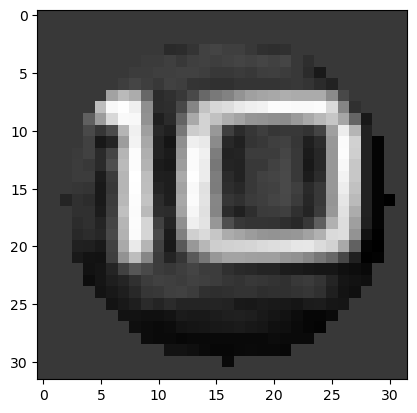

Center coordinates (x, y): 468 598


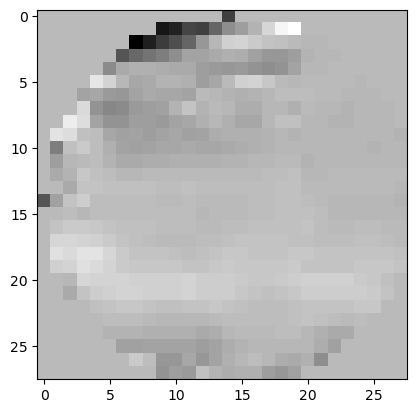

認識されたテキストが数字ではありません。
Center coordinates (x, y): 1050 620


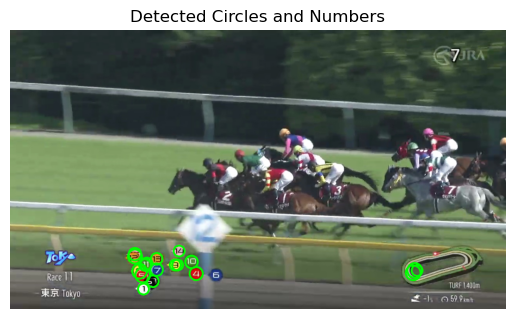

(18, 3)


In [3]:
from frame import Frame

# DataFrameを作成
df = pd.DataFrame(columns=['x', 'y', 'horse_num'])
# 画像を読み込む
image = cv2.imread('frame_500.jpg')

# 画像をグレースケールに変換
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# ノイズを除去するために画像をぼかす
# blurred = cv2.GaussianBlur(gray, (3, 3), 0) # 引数：画像、カーネルサイズ、標準偏差

f = Frame(image)
# circles = f.draw_circles(f.detect_circles())
circles = f.detect_circles()
print(circles.shape)    

# ハフ変換を使って円を検出
# 対象を画面の中央から幅80%，下20%の範囲に限定
# height, width = blurred.shape
# heiht, width でマスク
# mask = np.zeros_like(blurred)
# mask[int(height*0.7):height, int(width*0.18):int(width*0.82)] = 255
# masked_blurred = cv2.bitwise_and(blurred, blurred, mask=mask)
# # r=20程度の円を検出するためのパラメータ：
# circles = cv2.HoughCircles(masked_blurred, cv2.HOUGH_GRADIENT, 
#                            dp=1, minDist=5, param1=10, param2=15, minRadius=15, maxRadius=20)


# circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1, minDist=50, param1=50, param2=30, minRadius=30, maxRadius=50)

if circles is not None:
    # circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        # x: 円の中心のx座標, y: 円の中心のy座標, r: 円の半径
        horse_num = f.detect_number((x, y, r))

        # 検出された円を描画
        cv2.circle(image, (x, y), r, (0, 255, 0), 4)
        # 中心座標を描画
        # print(r)
        # cv2.circle(image, (x, y), 5, (0, 0, 255), -1)
        # 中心座標を表示
        print("Center coordinates (x, y):", x, y)
        # horse_numを列目として持つDataFrameに追加
        df.loc[len(df)] = [x, y, horse_num]


# 結果を表示
# cv2.imshow("Detected Circles", image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# matplotlibを使って結果を表示
# BGRからRGBに変換
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title('Detected Circles and Numbers')
plt.axis('off')  # 軸を非表示にする
plt.show()
print(circles.shape)

2853


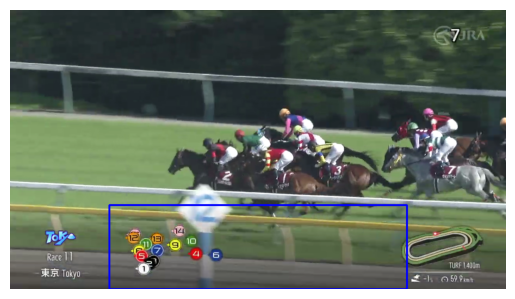

In [8]:
cap = cv2.VideoCapture("2024年 京王杯スプリングカップ（GⅡ）  ウインマーベル  JRA公式.mp4")

# すべてのフレーム数を取得
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(frame_count)

# 最初のフレームを読み込む
ret, frame = cap.read()
for i in range(500):
    ret, frame = cap.read()


# 100フレーム目までスキップ
for i in range(2000):
    # 画像の高さと幅を取得
    height, width, _ = frame.shape
    # 指定された領域を長方形で囲む
    top_left = (int(width*0.2), int(height*0.7))
    bottom_right = (int(width*0.8), height)
    cv2.rectangle(frame, top_left, bottom_right, (255, 0, 0), 3)  # 青色で3ピクセルの線幅
    # フレームを表示
    cv2.imshow('Frame', frame)

    # 'q'キーが押されたらループから抜ける
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
    
if not ret:
    print("フレームを読み込めませんでした。")
else:

    # 結果を表示
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    # plt.title('')
    plt.axis('off')
    plt.show()


(array([], dtype=int64), array([], dtype=int64))


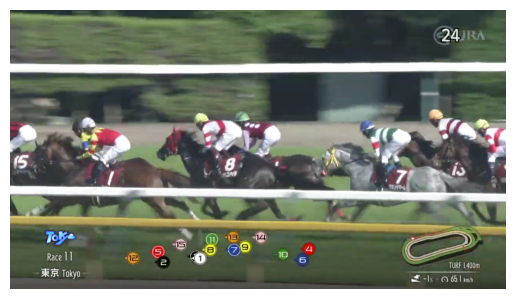

In [28]:
cap = cv2.VideoCapture("2024年 京王杯スプリングカップ（GⅡ）  ウインマーベル  JRA公式.mp4")

# すべてのフレーム数を取得
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

cap.set(cv2.CAP_PROP_POS_FRAMES, 1000)
# 最初のフレームを読み込む
ret, frame = cap.read()

# n1.pngとパターンマッチング
# 画像をグレースケールに変換
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
# 画像の高さと幅を取得
height, width = gray.shape

# テンプレート画像を読み込む
template = cv2.imread('n1.png', 0)
# テンプレート画像の高さと幅を取得
h, w = template.shape

# 領域を指定してテンプレートマッチング
res = cv2.matchTemplate(gray, template, cv2.TM_CCOEFF_NORMED)

# 類似度の閾値
threshold = 0.9
# 類似度が閾値以上の部分の位置を取得
loc = np.where(res >= threshold)
print(loc)

# 類似度が閾値以上の部分を長方形で囲む
for pt in zip(*loc[::-1]):
    bottom_right = (pt[0] + w, pt[1] + h)
    cv2.rectangle(frame, pt, bottom_right, (255, 0, 0), 3)  # 青色で3ピクセルの線幅

# 結果を表示
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


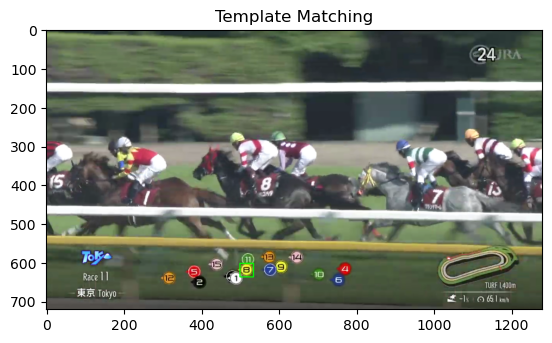

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

cap = cv2.VideoCapture("2024年 京王杯スプリングカップ（GⅡ）  ウインマーベル  JRA公式.mp4")

# すべてのフレーム数を取得
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

cap.set(cv2.CAP_PROP_POS_FRAMES, 1000)
# 最初のフレームを読み込む
ret, frame = cap.read()

# n1.pngとパターンマッチング
# 画像をグレースケールに変換
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
# 画像の高さと幅を取得
height, width = gray.shape

## ここからパターンマッチング
# 画像を読み込む
template = cv2.imread('i3.png', 0)  # テンプレートはグレースケールで読み込む

roi = gray[int(height*0.75):height, int(width*0.18):int(width*0.82)]

# テンプレートマッチングを実行
res = cv2.matchTemplate(roi, template, cv2.TM_CCOEFF_NORMED)

# 最も一致する位置を取得
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
top_left = max_loc
bottom_right = (top_left[0] + template.shape[1], top_left[1] + template.shape[0])

# 結果を描画
cv2.rectangle(roi, top_left, bottom_right, 255, 2)  # 白色で矩形を描画

# 元の画像に結果を反映
cv2.rectangle(frame, (int(width*0.18)+top_left[0], int(height*0.75)+top_left[1]), (int(width*0.18)+bottom_right[0], int(height*0.75)+bottom_right[1]), (0, 255, 0), 2)

# 結果を表示
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.title('Template Matching')
plt.show()